In [1]:
# Import all required libraries
from __future__ import division # For python 2.*

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml



# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)

# The test data
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.75)
Xtr, Ytr = ml.shuffleData(Xtr, Ytr)

# Taking a subsample of the data so that trains faster.  You should train on whole data for homework and Kaggle.
Xt, Yt = Xtr[:], Ytr[:]
print ("loadded")

loadded


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
from sklearn import metrics

clfs = []
rs= []
r2s= []

for i in range (10, 2150, 100):
    print (i)
    clf = RandomForestClassifier(bootstrap=True, max_depth=i, min_samples_leaf=2, min_samples_split = 15, 
                             criterion='entropy', n_estimators=300, n_jobs=4)
    clf.fit(Xtr, Ytr)
    
    pred = clf.predict_proba(Xtr)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(Ytr, pred)
    r = metrics.auc(fpr, tpr)
    print("Training AUC: ", r)
    rs.append(r)
    
    pred = clf.predict_proba(Xva)[:,1]
    fpr1, tpr1, thresholds1 = metrics.roc_curve(Yva, pred)
    r2 = metrics.auc(fpr1, tpr1)
    print("Validation AUC: ", r2)
    r2s.append(r2)
    
print ("done")

10
Training AUC:  0.742684388403
Validation AUC:  0.713862033727
110
Training AUC:  0.950984457743
Validation AUC:  0.786438001212
210
Training AUC:  0.950955367082
Validation AUC:  0.786777612934
310
Training AUC:  0.951208586345
Validation AUC:  0.786763880201
410
Training AUC:  0.95087120462
Validation AUC:  0.786794528086
510
Training AUC:  0.951053420542
Validation AUC:  0.786663670431
610
Training AUC:  0.951151419971
Validation AUC:  0.786771077514
710
Training AUC:  0.950894594557
Validation AUC:  0.786697162236
810
Training AUC:  0.95111659595
Validation AUC:  0.786599348609
910
Training AUC:  0.950845981191
Validation AUC:  0.786854277957
1010
Training AUC:  0.950745546539
Validation AUC:  0.786780554584
1110
Training AUC:  0.950918504293
Validation AUC:  0.786633791053
1210
Training AUC:  0.950938186822
Validation AUC:  0.786632990562
1310
Training AUC:  0.951209963831
Validation AUC:  0.786283153698
1410
Training AUC:  0.951008886389
Validation AUC:  0.787099909702
1510
Tra

Training and Validation AUC


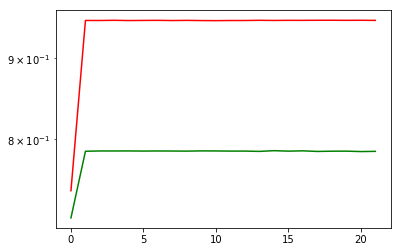

In [3]:
print ("Training and Validation AUC")
plt.semilogy(rs, 'r-', r2s, 'g-')
plt.show()

In [4]:
# pred = clf.predict_proba(Xtr)[:,1]
# print("Training AUC: ")
# fpr, tpr, thresholds = metrics.roc_curve(Ytr, pred)
# metrics.auc(fpr, tpr)

In [5]:
# pred = clf.predict_proba(Xva)[:,1]
# print("Validation AUC: ")
# fpr1, tpr1, thresholds1 = metrics.roc_curve(Yva, pred)
# metrics.auc(fpr1, tpr1)

In [6]:
## # Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
# Yte = np.vstack((np.arange(Xte.shape[0]), clf.predict_proba(Xte)[:,1])).T
# # Output a file with two columns, a row ID and a confidence in class 1:
# np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')